In [1]:
from ArgumentModel import ArgumentModel


model = ArgumentModel(num_agents=10, verbose=False)

model.run_n_steps(10)

In [2]:
df_model = model.datacollector.get_model_vars_dataframe()
import numpy as np
import pandas as pd
df = pd.DataFrame(dict(df_model.iloc[-1]["Commited"]))
df = df.applymap(lambda x: [] if not type(x) == list else x)

total = {}
df['total'] = np.zeros(len(df))
for agent in df:
    total[agent] = set()
    for val in df[agent].values:
        total[agent] = total[agent].union(set(val))
    
    df['total'][agent] = total[agent]

display(df)
agreed = df['total'][0]
for i in df['total'][1:]:
    agreed = agreed.intersection(i)
print(f"Agreed: {list(agreed)}")

/tmp/ipykernel_1734572/4117430538.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total'][agent] = total[agent]


,Agent 1,Agent 2,Agent 3,Agent 4,Agent 5,Agent 6,Agent 7,Agent 8,Agent 9,Agent 10,total
Agent 8,[C],[C],[],[C],[],[C],[],[],[],[],{C}
Agent 3,[D],[],[],[],[],[],[],[],[],[],{D}
Agent 6,[C],[C],[],[C],[],[],[],[C],[],[C],{C}
Agent 4,[],[C],[],[],[],[C],[],[C],[],[],{C}
Agent 1,[],[],[D],[],[],[C],[],[C],[],[],"{D, C}"
Agent 2,[],[],[],[C],[],[C],[],[C],[],[],{C}
Agent 10,[],[],[],[],[E],[C],[E],[],[],[],"{E, C}"
Agent 9,[],[],[],[],[E],[],[E],[],[],[],{E}
Agent 5,[],[],[],[],[],[],[E],[],[E],[E],{E}
Agent 7,[],[],[],[],[],[],[],[],[E],[E],{E}


Agreed: []


In [14]:
all_accepted = []
for i in df['total']:
    for j in i:
        all_accepted.append(j)

In [15]:
all_accepted

['C', 'D', 'C', 'C', 'D', 'C', 'C', 'E', 'C', 'E', 'E', 'E']

<Axes: ylabel='Count'>

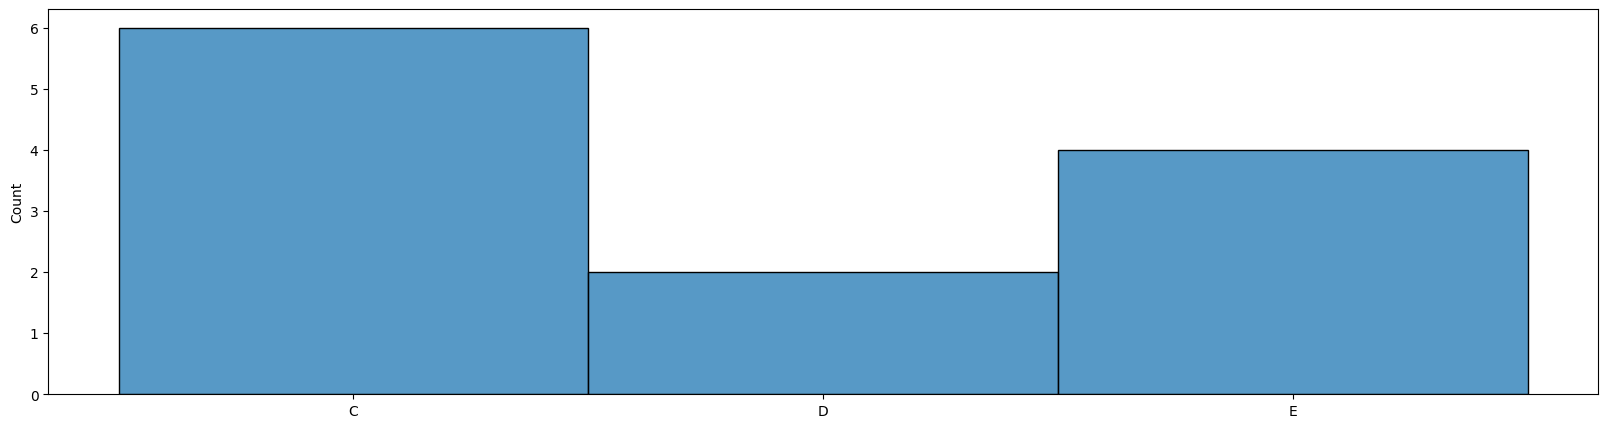

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
sns.histplot(all_accepted, bins=len(set(all_accepted)))